# Virtual Code Environments

In this chapter, you're going to learn about virtual coding environments. These allow you to isolate all of the packages that you're using to do analysis for one project from the set of packages you might need for a different project. They're an important part of creating a reproducible analytical pipeline (more on that in {ref}`wrkflow-rap` but a key benefit is that others can reproduce the environment you used) and it's best practice to have an isolated environment per project.

It may be easier to illustrate creating separate environments with an example. Let's say you're using Python 3.8, statsmodels, and pandas for one project, project A. And, for project B, you're using Python 3.9 with numpy and scikit-learn. Even with the same version of Python, best practice would be to have two separate virtual Python environments: environment A, with everything needed for project A, and environment B, with everything needed for project B. For the case where you're using different versions of Python, this isn't just best practice, it's essential.

Many programming languages now come with an option to install packages and a version of the language in isolated enironments. In Python, there are multiple tools for managing different environments. Of those, the easiest to work with is probably [**Anaconda**](https://docs.conda.io/projects/conda/en/latest/index.html) (conda for short), though [**poetry**](https://python-poetry.org/) is another strong option.

If you're just getting going with coding, this book recommends that you use Anaconda (aka conda) environments.

## Using Anaconda to Manage Python Environments

Much of these two subsections is covered by the Anaconda documentation on [managing virtual environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

### Creating Environments

If you're using Anaconda, you manage and change environments on the command line (more on the command line in {ref}`wrkflow-command-line`). Before following these instructions, check that you have Anaconda installed and activated. You should see something like `(base) username@computername:~$` on the command line (base is the default conda environment).

To create a new environment called "myenv" with a specific version of Python (but no extra packages installed), it's

```bash
conda create -n myenv python=3.8
```

where you can of course specify other versions of Python by changing the number. To throw in a package or two, just add them to the end, for example

```bash
conda create -n myenv python=3.8 pandas jupyter
```

You can see a list of the currently installed environments by running

```bash
conda env list
```

Running the same command within an environment will 

When you install Anaconda, you will begin with a "base" environment. It's a good idea not to use this for projects but to instead to create a new environment for each project.

There are two downsides to installing environments directly from the command line. One is that you may have lots of packages. The second is that you may wish to keep a record of the environment you created. For both of these reasons, you can specify a conda environment using a file.

The pandas example we saw above would look like

```yaml
name: myenv
channels:
  - conda-forge
dependencies:
  - python=3.8
  - pandas
  - jupyter

```

The environment is given by `name`, the channel (where to look for the packages) by `channels`, the specific packages by `dependencies`. Not all packages are available on conda's channels, so sometimes extra ones are needed. And some packages are only available on pip; these can be specified with a sub-section of the file like so for the **skimpy** package:

```yaml
name: myenv
channels:
  - conda-forge
dependencies:
  - python=3.8
  - pandas
  - jupyter
  - pip:
    - skimpy

```

This goes into a file called `environment.yml`, which can be installed by running

```bash
conda env create -f environment.yml
```

This book is put together using an isolated *conda* environment specificied in a file. It's an unusually big one because there are a lot of packages featured in the book! Here they are:

In [1]:
from rich import print

with open("environment.yml", 'r') as stream:
    data_loaded = stream.read()

print(data_loaded)

name: codeforecon
channels:
  - conda-forge
  - fastai
dependencies:
  - jupyter
  - numpy
  - pandas
  - pip
  - python=3.8
  - pyyaml
  - scipy
  - seaborn
  - statsmodels
  - tqdm
  - yaml
  - pycodestyle
  - pyarrow
  - geopandas
  - autopep8
  - geoplot
  - nltk
  - arrow
  - osmnx
  - pandas-datareader
  - pandasdmx
  - pdfminer.six
  - jupyter-book
  - pytest
  - rich
  - pyinstrument
  - loguru
  - pre-commit
  - pandera
  - linearmodels
  - sympy
  - pingouin
  - jax
  - plotly
  - spacy
  - pandas-profiling
  - plotnine
  - altair
  - datatable
  - cerberus
  - great-expectations
  - dagster
  - icecream
  - waterfallcharts
  - matplotlib-venn
  - pywaffle
  - joypy
  - jupyterlab
  - textstat
  - nbstripout
  - vega_datasets
  - ghp-import
  - colorcet
  - holoviews
  - requests-cache
  - pip
  - fastcore
  - arch-py
  - workalendar
  - wordcloud
  - pymc3
  - theano-pymc
  - mkl
  - mkl-service
  - bambi
  - pdftotext
  - bottleneck
  - pip:
    - specification_curve
    - twopiece
    - stargazer
    - matplotlib-scalebar
    - black-nb
    - pyhdfe
    - skimpy
    - dataprep
    - graphviz
    - ruptures

Of course, you can install packages as you go too, you don't have to specify them when you create the environment. With the relevant environment activated, use `conda install packagename` to do this.

Finally, to remove an environment, it's

```bash
conda remove --name myenv --all
```

### Using and Switching Between Conda Environments 

To switch between conda environments on the command line, for example from the base environment to an environment called "myenv", use

```bash
conda activate myenv
```

on the command line. However, this only switches the environment if you plan to run code on the command line!

Fortunately, Visual Studio Code has you covered and makes it very easy to switch Python environments for a project at the click of a button.

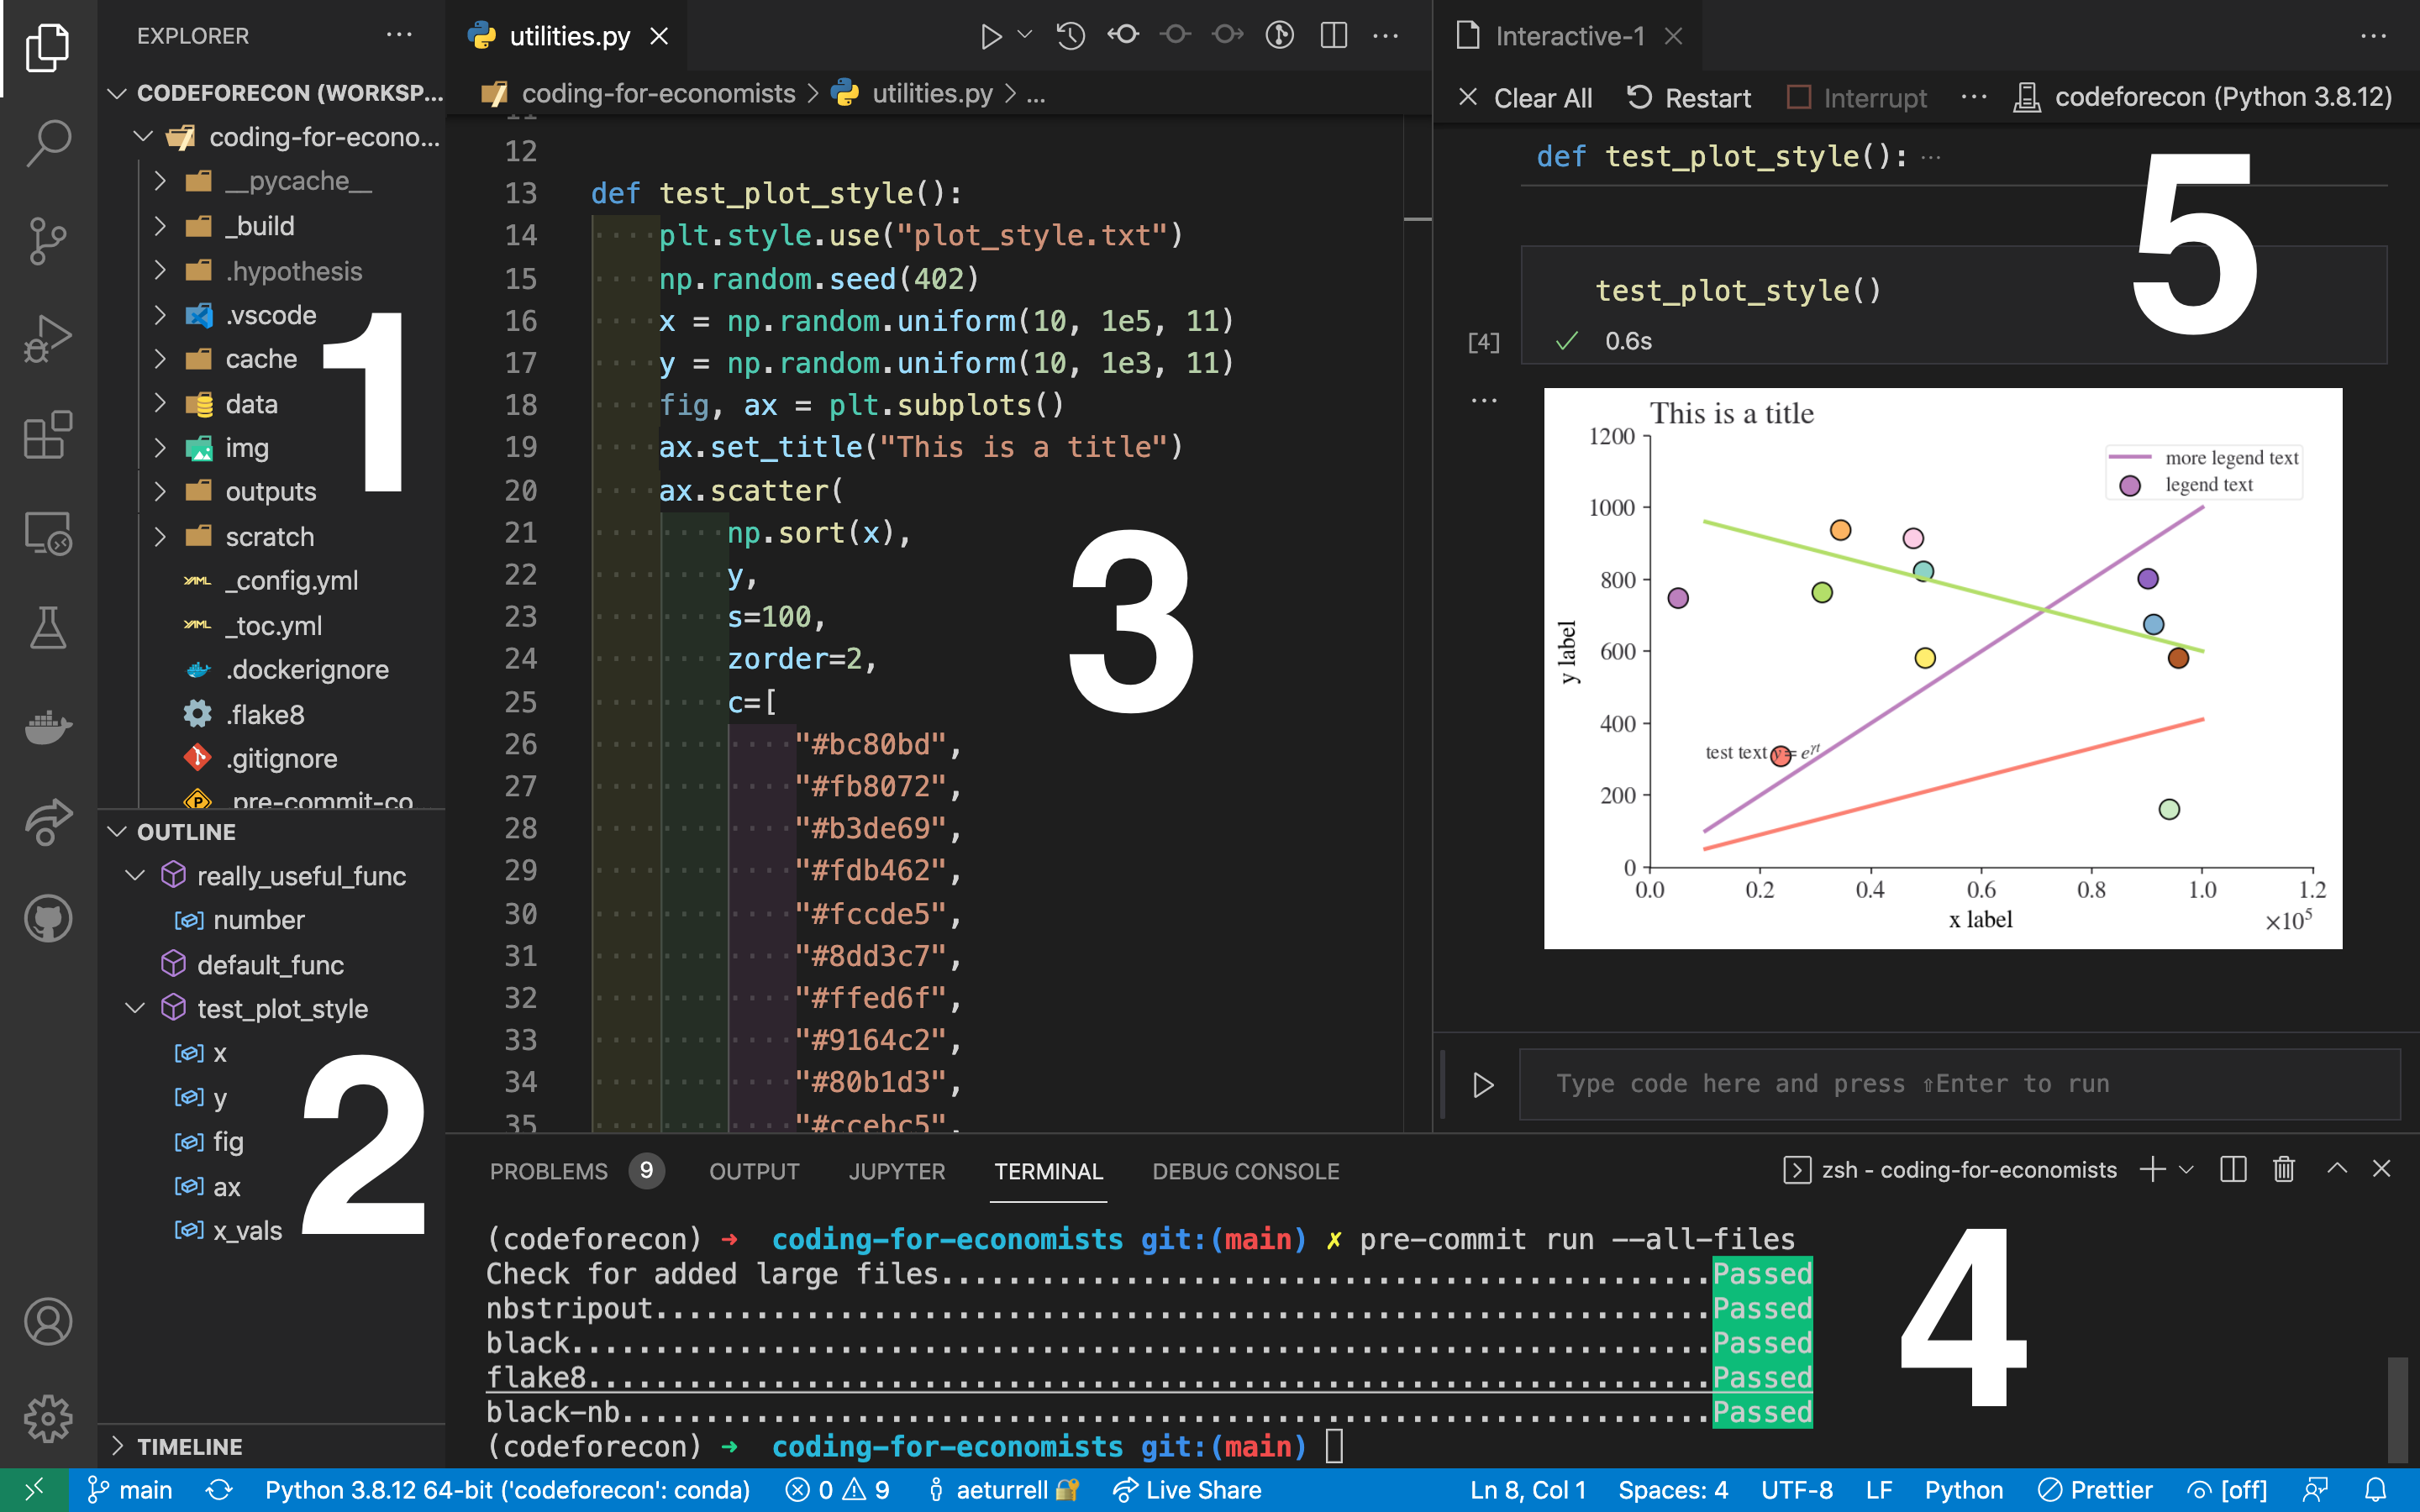

In the screenshot above, you can see the project-environment in two places: on the blue bar at the bottom of the screen, and (in 5), at the top right hand side of the interactive window. Click on either to change the Python environment that will be used to execute code. A similar top right selector is present for Jupyter Notebooks too.

## Using Poetry to Manage Environments

[**Poetry**](https://python-poetry.org/) takes a different tack to Anaconda, and one that is built around creating Python packages. So it's more suited to intermediate to advanced coders. As well as providing virtual environments, it can:
- creates virtual environments on a per project basis
- manage Python package dependencies, and logs them automatically
- manage Python package versions, and logs them automatically
- install all needed dependencies and packages from previously auto-generated (by Poetry) lists of versions
- (advanced) build Python packages
- (advanced) upload Python packages to PyPI where they can be installed (ie make your project pip installable by anyone in the world)

Just like conda, poetry is a command line tool. But *unlike* conda, the environment it creates is tied to your project folder. After navigating to your project folder on the command line, use

```bash
poetry init
```

This will prompt you with a series of questions about the basic packages and version of Python you want to use for your project and will create a (human-readable) `pyproject.toml` file that lists the packages needed for your project. It will also create a virtual Python environment just for your project.

To add and install packages, the command is `poetry add package-name`. As you add packages, you will see that the `pyproject.toml` file automatically becomes populated with what you installed. Here's an excerpt of a typical `pyproject.toml` file designed for reproducibility:

```text
[tool.poetry.dependencies]
python = "3.7.1"
click = "8.0.1"
rich = "10.9.0"
pandas = "1.3.2"
Pygments = "2.10.0"
typeguard = "2.12.1"
```

The first line here says that this runs on Python 3.7.1. A second file, `poetry.lock`, is also created. This "locks" down the dependencies of your packages.

### Using Poetry Environments 

To use the virtual environment to run scripts or tools installed using `poetry add`, you will need to use `poetry run command-name` rather than the usual `command-name`. For example, if you have a script `analysis.py`, you would call it with `poetry run python analysis.py`. You can also open a command line within the virtual environment using `poetry shell`.

Visual Studio Code makes this easier though: just as with conda environments, you can set your interactive window or jupyter notebooks to execute with a specific poetry environment.

Poetry is especially strong for reproducibility. Imagine you wish to have a co-author or colleague install everything they need for the project. If you send them the automatically generated `pyproject.toml` and `poetry.lock` files then all they need is to have the right version of Python installed already, to navigate to the project folder in the command line, and then to use `poetry install`. This will install all of the packages needed to run the code!